# import

In [3]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install datetime

     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------- ----- 51.2/59.7 kB 2.7 MB/s eta 0:00:01
     ---------------------------------------- 59.7/59.7 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.2/11.6 MB 7.6 MB/s eta 0:00:02
   - -------------------------------------- 0.6/11.6 MB 7.1 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.6 MB 7.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.6 MB 8.7 MB/s eta 0:00:02
   ------ --------------------------------- 2.0/11.6 MB 9.1 MB/s eta 0:00:02
   -------- ------------------------------- 2.5/11.6 MB 9.5 MB/s eta 0:00:01
   ---------- ----------------------------- 2.9/11.6 MB 9.3 MB/s eta 0:00:01
   ----------- ---------------------------- 3.5/11.6 MB 9.6 MB/s eta 0:00:01
   ------------- -------------------------- 4.0/11.6 MB 9.9 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     ------------------------- ------------ 112.6/167.0 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 167.0/167.0 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------------------------------- -- 276.5/294.9 kB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB 6.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.8 MB 7.8 MB/s eta 0:00:01
   ----- ---------------------------------- 1.1/7.8 MB 8.0 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/7.8 MB 9.0 MB/s eta 0:00:01
   ----------- ---------------------------- 2.2/7.8 MB 9.3 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.8 MB 9.8 MB/s eta 0:00:01
   --------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/44.8 kB ? eta -:--:--
     ---------------------------------------- 44.8/44.8 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/52.6 kB ? eta -:--:--
   ---------------------------------------- 52.6/52.6 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/212.0 kB ? eta -:--:--
   ---------------------------------------- 212.0/212.0 kB 6.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install numpy
!pip install scipy
!pip install scikit-learn
!pip install statsmodels



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/44.8 MB 5.3 MB/s eta 0:00:09
    --------------------------------------- 0.6/44.8 MB 7.2 MB/s eta 0:00:07
    --------------------------------------- 1.1/44.8 MB 8.7 MB/s eta 0:00:06
   - -------------------------------------- 1.6/44.8 MB 9.2 MB/s eta 0:00:05
   - -------------------------------------- 2.1/44.8 MB 9.5 MB/s eta 0:00:05
   -- ------------------------------------- 2.7/44.8 MB 10.0 MB/s eta 0:00:05
   -- ------------------------------------- 3.1/44.8 MB 9.8 MB/s eta 0:00:05
   --- ------------------------------------ 3.5/44.8 MB 9.7 MB/s eta 0:00:05
   --- ------------------------------------ 3.9/44.8 MB 9.7 MB/s eta 0:00:05
   -


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.2/11.0 MB 3.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/11.0 MB 6.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/11.0 MB 6.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.0 MB 7.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.0 MB 7.9 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/11.0 MB 7.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.8/11.0 MB 8.4 MB/s eta 0:00:01
   ------------ --------------------------- 3.3/11.0 MB 8.8 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.0 MB 9.2 MB/s eta 0:00:01
   ---------------- ----------------------- 4.4/11.0 MB 9.5 MB/s eta 0:00:01
   ------------------ --------------------- 5.0/11.0 MB 9.7 MB/s eta 0:00:01
   -----------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB 3.2 MB/s eta 0:00:04
   - -------------------------------------- 0.5/9.9 MB 5.6 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/9.9 MB 7.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.9 MB 7.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/9.9 MB 7.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/9.9 MB 8.1 MB/s eta 0:00:01
   ---------- ----------------------------- 2.7/9.9 MB 8.6 MB/s eta 0:00:01
   ------------- -------------------------- 3.2/9.9 MB 9.0 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.9 MB 9.2 MB/s eta 0:00:01
   ----------------- ---------------------- 4.3/9.9 MB 9.4 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.9 MB 9.3 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.9 MB 9.5 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB 3.9 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.8 MB 5.3 MB/s eta 0:00:01
   -------------------- ------------------- 1.0/1.8 MB 6.0 MB/s eta 0:00:01
   ------------------------------- -------- 1.4/1.8 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Data

In [8]:
#개인이 갖고 있는 파일 불러와주세요!
amazon = pd.read_csv('C:/Git/실전프로젝트/AmazonFoodCategory Dataset.csv')

-데이터전처리

In [9]:
amazon = amazon[amazon['Discount Amount'] >=0]
amazon = amazon[amazon['Sales Price'] > 0]
amazon = amazon[amazon['Sales Quantity'] > 0]
amazon.drop(['Line Number','Sales Rep','Invoice Date', 'Order Number','Item Number', 'Item Class', 'Promised Delivery Date'], axis = 1, inplace = True)
amazon = amazon[amazon['Sales Cost Amount'] > 0]
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64223 entries, 0 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           64223 non-null  int64  
 1   DateKey                           64223 non-null  object 
 2   Discount Amount                   64223 non-null  float64
 3   Invoice Number                    64223 non-null  int64  
 4   Item                              64223 non-null  object 
 5   List Price                        64223 non-null  float64
 6   Sales Amount                      64223 non-null  float64
 7   Sales Amount Based on List Price  64223 non-null  float64
 8   Sales Cost Amount                 64223 non-null  float64
 9   Sales Margin Amount               64223 non-null  float64
 10  Sales Price                       64223 non-null  float64
 11  Sales Quantity                    64223 non-null  int64  
 12  U/M      

In [10]:
# 날짜 필터링 

start_date= '2017-01-01'
end_date= '2018-03-21'

amazon['DateKey'] = pd.to_datetime(amazon['DateKey'], format= '%m/%d/%Y')
amazon = amazon[(amazon['DateKey'] >=start_date) & (amazon['DateKey'] <= end_date)]
# sorted(amazon['DateKey'].unique())

amazon.info()
amazon.head(3)


<class 'pandas.core.frame.DataFrame'>
Index: 36307 entries, 28021 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           36307 non-null  int64         
 1   DateKey                           36307 non-null  datetime64[ns]
 2   Discount Amount                   36307 non-null  float64       
 3   Invoice Number                    36307 non-null  int64         
 4   Item                              36307 non-null  object        
 5   List Price                        36307 non-null  float64       
 6   Sales Amount                      36307 non-null  float64       
 7   Sales Amount Based on List Price  36307 non-null  float64       
 8   Sales Cost Amount                 36307 non-null  float64       
 9   Sales Margin Amount               36307 non-null  float64       
 10  Sales Price                       36307 non-nul

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,U/M
28021,10008602,2018-03-21,439.2400,226437,Tell Tale Summer Squash,195.0000,535.76,975.0000,372.26,163.50,107.152000,5,EA
28022,10008602,2018-03-21,1517.3076,226437,Nationeel Avocado Dip,842.0244,1850.79,3368.0976,1256.20,594.59,462.697500,4,EA
28023,10014779,2018-03-21,192.4900,226451,Super White Sugar,157.7600,280.79,473.2800,143.73,137.06,93.596667,3,SE


In [11]:
temp= amazon['Custkey'].value_counts()
print(len(temp[temp > 1]))
# 34292 개의 Custkey 데이터 중에 중복구매한 사용자 수 482
print(len(temp[temp==1]))
# 1인 사람 41개
print(len(temp))

487
42
529


In [12]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36307 entries, 28021 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Custkey                           36307 non-null  int64         
 1   DateKey                           36307 non-null  datetime64[ns]
 2   Discount Amount                   36307 non-null  float64       
 3   Invoice Number                    36307 non-null  int64         
 4   Item                              36307 non-null  object        
 5   List Price                        36307 non-null  float64       
 6   Sales Amount                      36307 non-null  float64       
 7   Sales Amount Based on List Price  36307 non-null  float64       
 8   Sales Cost Amount                 36307 non-null  float64       
 9   Sales Margin Amount               36307 non-null  float64       
 10  Sales Price                       36307 non-nul

In [13]:
print('총 매출: ', round(amazon['Sales Amount'].sum(), 2))
print('총 할인 금액: ', round(amazon['Discount Amount'].sum(), 2))

총 매출:  96803974.11
총 할인 금액:  69436945.25


# 고객별 Sales Amount

In [14]:
cust_m= amazon.groupby('Custkey')['Sales Amount'].sum().reset_index()

cust_m.sort_values(by= 'Sales Amount', ascending= False)

,Custkey,Sales Amount
343,10021485,10949474.37
432,10025024,7951267.71
443,10025052,5419724.38
440,10025039,3259962.46
489,10025919,3250786.04
...,...,...
491,10026009,224.55
272,10019812,221.04
427,10024924,216.33
169,10013039,216.20


In [15]:
# R, F

cust_rf = amazon.groupby('Custkey').agg(
    Last_Purchase=('DateKey', 'max')
    , Frequency=('Invoice Number', 'count') 
).reset_index()

cust_rf

,Custkey,Last_Purchase,Frequency
0,10000453,2017-01-06,10
1,10000455,2017-11-04,19
2,10000456,2017-12-04,23
3,10000457,2017-12-01,3
4,10000458,2018-03-06,4
...,...,...,...
524,10027381,2018-03-14,108
525,10027560,2017-12-26,42
526,10027572,2018-03-20,45
527,10027575,2018-03-06,5


# RFM 523개

In [16]:
cust_rfm= cust_rf.merge(cust_m, on= 'Custkey')

cust_rfm= cust_rfm.rename(columns= {'Last_Purchase': 'Recency',
                          'Sales Amount': 'Monetary'})

In [17]:
cust_rfm.info()
cust_rfm.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Custkey    529 non-null    int64         
 1   Recency    529 non-null    datetime64[ns]
 2   Frequency  529 non-null    int64         
 3   Monetary   529 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 16.7 KB


,Custkey,Recency,Frequency,Monetary
0,10000453,2017-01-06,10,8422.15
1,10000455,2017-11-04,19,22403.73
2,10000456,2017-12-04,23,104994.68


In [18]:
# recency datetime으로 변환
cust_rfm['Recency']= pd.to_datetime(cust_rfm['Recency'])

# 2018 03 22을 현재날짜로 설정, 가장 최근의 주문 일자를 뺌
cust_rfm['Recency']= dt.datetime(2018, 3, 22) - cust_rfm['Recency']
# 01로 하니까 오류남

# +1
cust_rfm['Recency']= cust_rfm['Recency'].apply(lambda x:x.days+1)

cust_rfm

,Custkey,Recency,Frequency,Monetary
0,10000453,441,10,8422.15
1,10000455,139,19,22403.73
2,10000456,109,23,104994.68
3,10000457,112,3,14284.80
4,10000458,17,4,4994.49
...,...,...,...,...
524,10027381,9,108,70994.97
525,10027560,87,42,48482.74
526,10027572,3,45,46290.99
527,10027575,17,5,3548.62


In [19]:
cust_rfm['Monetary'] = cust_rfm['Monetary'].astype(int)

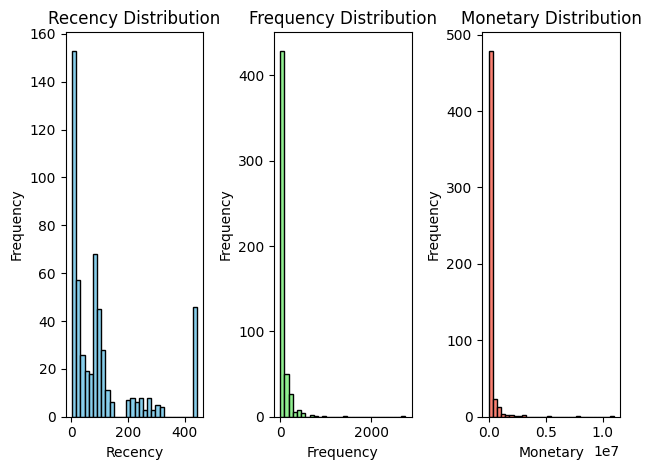

In [20]:
plt.subplot(1,3,1)
plt.hist(cust_rfm['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(cust_rfm['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(cust_rfm['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

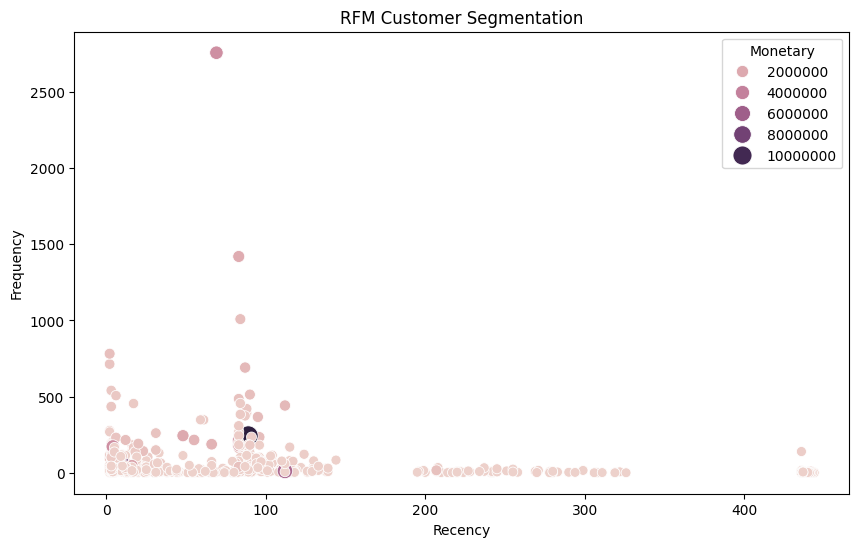

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='Frequency', hue='Monetary', data=cust_rfm, size='Monetary', sizes=(50,200))
plt.title('RFM Customer Segmentation')
plt.show()

# 데이터 스케일링

In [22]:
cust_rfm_drop = cust_rfm.drop(columns='Custkey')

In [23]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

In [24]:
rb = PowerTransformer(method='box-cox')
mm = MinMaxScaler()
amazon_rfm_rb = pd.DataFrame(rb.fit_transform(cust_rfm_drop), columns=cust_rfm_drop.columns)
amazon_scaled = pd.DataFrame(mm.fit_transform(amazon_rfm_rb), columns=cust_rfm_drop.columns)

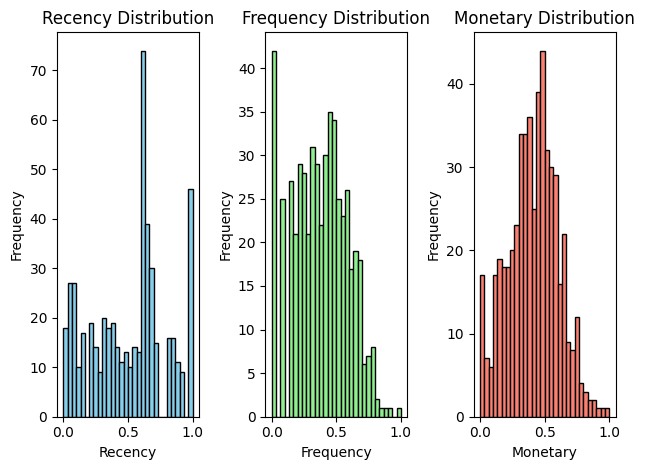

In [25]:
plt.subplot(1,3,1)
plt.hist(amazon_scaled['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(amazon_scaled['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(amazon_scaled['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

# K-Means 클러스터링

In [28]:
!pip install yellowbrick

In [29]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

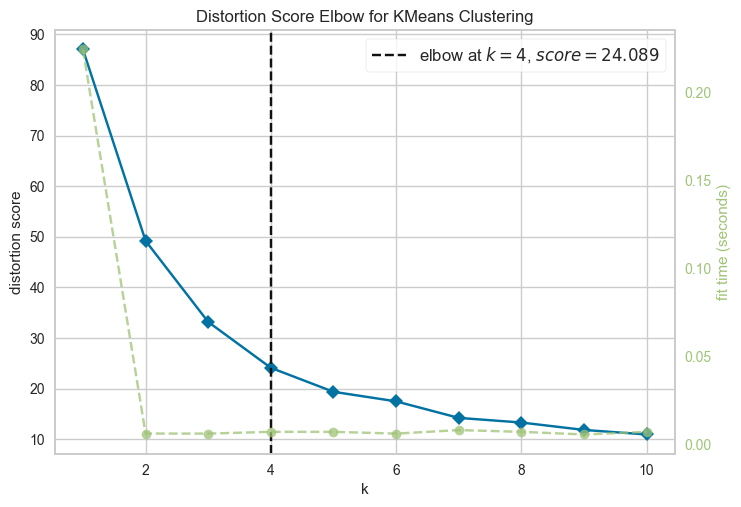

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
kmeans = KMeans(random_state=42)
elbow = KElbowVisualizer(kmeans, k=(1,11))
elbow.fit(amazon_scaled)
elbow.show()

-The KElbowVisualizer also displays the amount of time to train the clustering model per "K" as a dashed green line, but is can be hidden by setting (timings=False). 
-score: SSE(Sum of Square Errors)

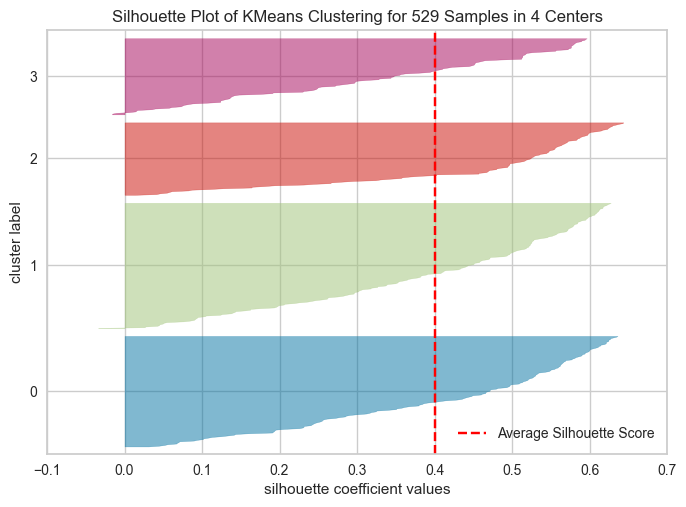

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 529 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
kmeans_4 = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_4, colors='yellowbrick')
visualizer.fit(amazon_scaled)
visualizer.show()

In [32]:
k=4
kmeans_4 = KMeans(4, random_state=4)
kmeans_4.fit(amazon_scaled)
cluster = kmeans_4.labels_

In [33]:
amazon_scaled['cluster']=cluster
amazon_kmeans =amazon_scaled.copy()
amazon_kmeans

,Recency,Frequency,Monetary,cluster
0,0.998269,0.294586,0.309493,1
1,0.724102,0.376125,0.396361,2
2,0.671295,0.400348,0.538056,2
3,0.677112,0.140959,0.356128,1
4,0.317094,0.177748,0.263980,3
...,...,...,...,...
524,0.213750,0.595621,0.501626,0
525,0.623758,0.476548,0.466470,2
526,0.053682,0.485265,0.462229,0
527,0.317094,0.206249,0.234539,3


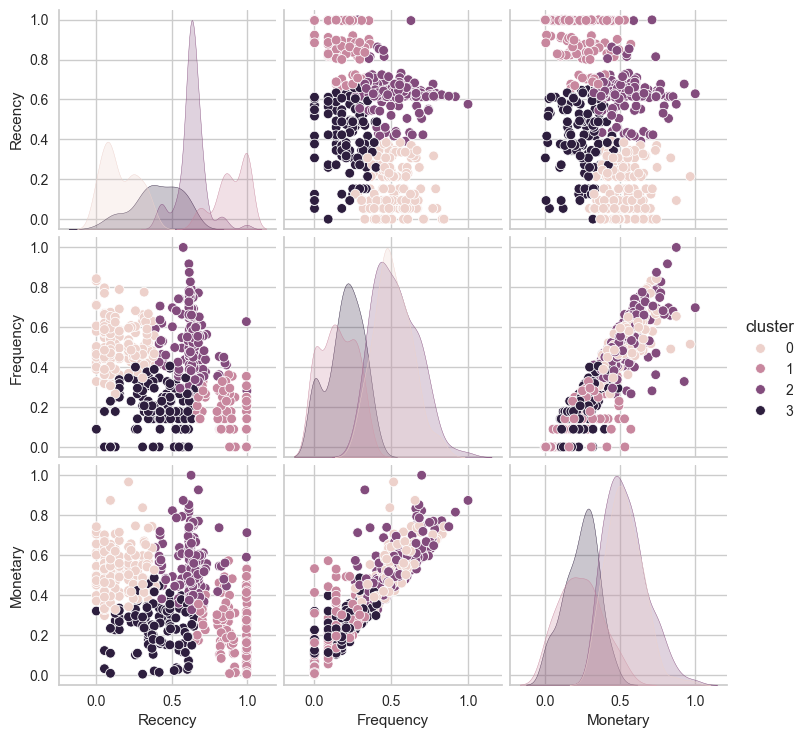

In [34]:
sns.pairplot(amazon_kmeans, hue='cluster')
plt.show()

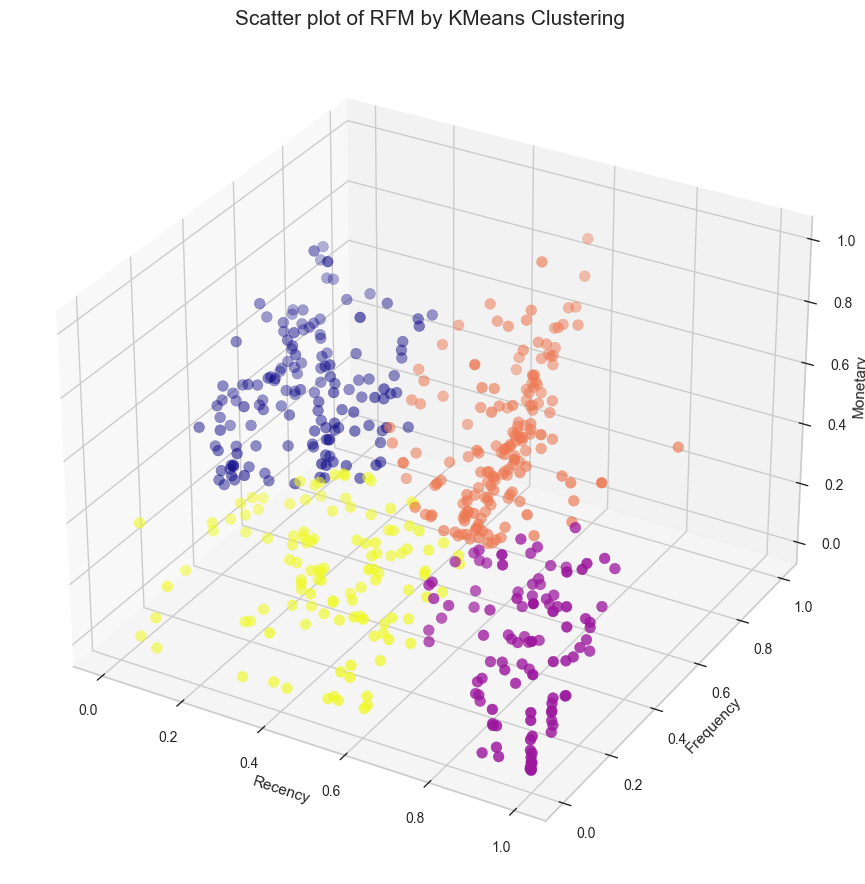

In [35]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(amazon_kmeans['Recency'], amazon_kmeans['Frequency'], amazon_kmeans['Monetary'], c=amazon_kmeans['cluster'], s=60, depthshade= True, cmap='plasma')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Scatter plot of RFM by KMeans Clustering', fontsize = 15)
plt.tight_layout()
plt.show()